# Creating stored procedures with INOUT parameters

Sometimes, you may want to return values from stored procedures. To achieve this, you can use the `create procedure` statement with `INOUT` parameters.

Here’s the basic syntax for creating a stored procedure with `INOUT` parameters:

```postgresql
create or replace procedure sp_name(
    inout parameter type, ...
)
as
$$
   -- body
$$
language plpgsql; 
```

# Calling stored procedures with INOUT parameters

To call a stored procedure, you use the `call` statement without providing the `INOUT` parameters:

```postgresql
call sp_name(); 
```

If you call a stored procedure with `INOUT` parameters in an anonymous block, you need to pass arguments to the stored procedure call as follows:

```postgresql
do
$$
   declare
      v_name1 type;
      v_name2 type;
   begin
      -- call the stored procedure with inout parameters
      call sp_name(v_name1, v_name2);

      -- process v_name1, v_name2
   end;
$$; 
```


# PostgreSQL Stored Procedures with INOUT parameter examples

Let’s take some examples of creating stored procedures with `INOUT` parameters. We’ll use the `film` table in the sample database for the demonstration:

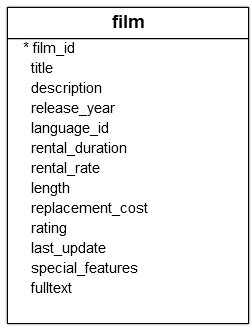

## 1) Basic PostgreSQL stored procedures with INOUT parameter example

First, create a stored procedure that counts the number of rows from the `film` table:

```postgresql
create or replace procedure count_film(
    inout total_film int default 0
)
as
$$
begin
    select count(*) from film
    into total_film;
end;
$$
language plpgsql; 
```

Second, call the stored procedure without providing the `total_film` parameter:

```postgresql
call count_film(); 
```

Output:

```
total_film
------------
       1000
(1 row)
```

Third, call the stored procedure `count_film()` in an anonymous block:

```postgresql
do
$$
declare
   total_film int = 0;
begin
   call count_film(total_film);
   raise notice 'Total film: %', total_film;
end;
$$; 
```

Output:

```
NOTICE:  Total film: 1000
```


## 2) Creating stored procedures with multiple INOUT parameters

First, create a new stored procedure that retrieves the film statistics, including film count, total length, and average rental rate:

```postgresql
create or replace procedure film_stat(
   inout total_film int default 0,
   inout total_length int default 0,
   inout avg_rental_rate numeric(4,2) default 0
)
as
$$
begin
  select count(*) into total_film
  from film;

  select sum(length) into total_length
  from film;

  select round(avg(rental_rate),2) into avg_rental_rate
  from film;
end;
$$
language plpgsql; 
```

Second, call the stored procedure `film_stat()`:

```postgresql
call film_stat(); 
```

Since all the parameters in the `film_stat()` stored procedure are the `inout` parameters, you don’t need to pass any parameters.

Output:

```
total_film | total_length | avg_rental_rate
------------+--------------+-----------------
       1000 |       115272 |            2.98
(1 row)
```
